# READ IN DATA

In [297]:
import pandas as pd

Data = pd.read_csv("Red_Light_Camera_Violations.csv")

In [2]:
Data

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Zipcode
0,31ST ST AND MARTIN LUTHER KING DRIVE,2121.0,3100 S DR MARTIN L KING,8/2/2014,16,NaN,NaN,NaN,NaN,NaN,60616
1,MADISON AND CENTRAL,1751.0,0 S CENTRAL AVENUE,7/15/2014,5,NaN,NaN,NaN,NaN,NaN,60644
2,HOMAN/KIMBALL AND NORTH,1771.0,1600 N HOMAN AVENUE,7/27/2014,1,NaN,NaN,NaN,NaN,NaN,60647
3,IRVING PARK AND LARAMIE,1533.0,5200 W IRVING PARK ROA,8/7/2014,6,NaN,NaN,NaN,NaN,NaN,60641
4,ASHLAND AND MADISON,1911.0,0 N ASHLAND AVE,7/23/2014,1,NaN,NaN,NaN,NaN,NaN,60607
...,...,...,...,...,...,...,...,...,...,...,...
310574,BELMONT AND KEDZIE,1373.0,3200 W BELMONT,3/17/2017,3,1154461.588,1921143.091,41.939441,-87.707719,"(41.93944056117365, -87.70771851630873)",60618
310575,CENTRAL AND IRVING PARK,1183.0,5600 W IRVING PARK ROAD,3/17/2017,2,1138281.535,1926078.648,41.953293,-87.767066,"(41.953292847298, -87.76706570775266)",60641
310576,PULASKI AND DIVERSEY,1542.0,2800 N PULASKI ROAD,3/17/2017,2,1149200.725,1918332.223,41.931831,-87.727127,"(41.93183102561505, -87.72712687300454)",60647
310577,ASHLAND AND IRVING PARK,1153.0,1600 W IRVING PARK ROA,3/17/2017,5,NaN,NaN,NaN,NaN,NaN,60613


# DESCRIPTIVE ANALYSIS

In [3]:
##  310579 rows x 11 columns
## Find missing % of values in each columns 

Missing = Data.isna().sum() / len(Data)
Missing

INTERSECTION      0.000000
CAMERA ID         0.001146
ADDRESS           0.000000
VIOLATION DATE    0.000000
VIOLATIONS        0.000000
X COORDINATE      0.059885
Y COORDINATE      0.059885
LATITUDE          0.059885
LONGITUDE         0.059885
LOCATION          0.059885
Zipcode           0.000000
dtype: float64

In [4]:
print("Most frequent Intersection", Data['INTERSECTION'].mode())
print("Most Frequent Address", Data['ADDRESS'].mode())
print("Average Number of violations", round(Data['VIOLATIONS'].mean(),0))
print("Most frequent ZipCode ", Data['Zipcode'].mode())
print("Variance of Violations", Data['VIOLATIONS'].var())
print("Standard Dev of Violations", Data['VIOLATIONS'].std())



Most frequent Intersection 0    CALIFORNIA AND DIVERSEY
dtype: object
Most Frequent Address 0    800 W ROOSEVELT ROAD
dtype: object
Average Number of violations 6.0
Most frequent ZipCode  0    60639
dtype: int64
Variance of Violations 52.06847367462309
Standard Dev of Violations 7.21584878407406


In [5]:
Data['VIOLATIONS'].hist()

In [6]:
Outlier=Data['VIOLATIONS'].mean() + 3* Data['VIOLATIONS'].std()

print("Outlier threshold for Violations", Outlier)

print("Number of outliers", Data[Data['VIOLATIONS'] > Outlier].shape[0])

Outlier threshold for Violations 27.279945838343263
Number of outliers 5426


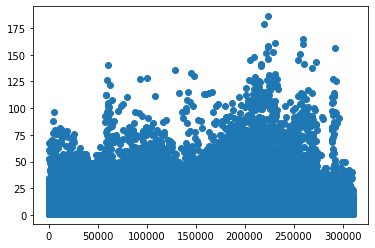

In [7]:
import matplotlib as plt


plt.pyplot.scatter(list(range(1, 310579  +1)), Data['VIOLATIONS'])

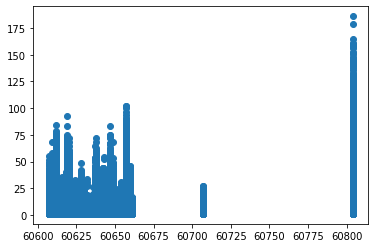

In [8]:
import matplotlib as plt

plt.pyplot.scatter(Data['Zipcode'], Data['VIOLATIONS'])

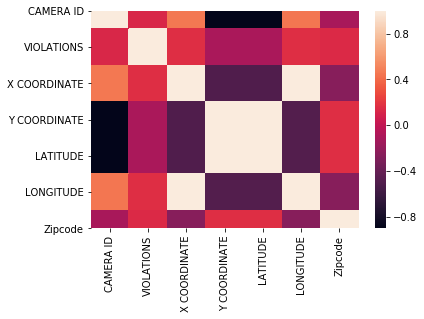

In [9]:
import seaborn as sns
sns.heatmap(Data.corr(), 
        xticklabels=Data.corr().columns,
        yticklabels=Data.corr().columns)

In [10]:
round(Data.corr(),2)

,CAMERA ID,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,Zipcode
CAMERA ID,1.00,0.13,0.46,-0.90,-0.90,0.45,-0.11
VIOLATIONS,0.13,1.00,0.17,-0.11,-0.11,0.17,0.14
X COORDINATE,0.46,0.17,1.00,-0.50,-0.50,1.00,-0.25
Y COORDINATE,-0.90,-0.11,-0.50,1.00,1.00,-0.49,0.16
LATITUDE,-0.90,-0.11,-0.50,1.00,1.00,-0.49,0.16
LONGITUDE,0.45,0.17,1.00,-0.49,-0.49,1.00,-0.25
Zipcode,-0.11,0.14,-0.25,0.16,0.16,-0.25,1.00


# DATA PREPROCESSING

In [298]:
## Remove X Coordinate, Y Coordinate, Latittude and Longitutde, Location as they are just identifers

## Also remove Camera ID as well

Data = Data.drop(columns=['X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'CAMERA ID', 'LOCATION'])



In [299]:
Data['Violation_Month'] =  pd.DatetimeIndex(Data['VIOLATION DATE']).month

Data['Violation_Year'] = pd.DatetimeIndex(Data['VIOLATION DATE']).year

Data=Data.drop(columns="VIOLATION DATE")

In [300]:
import numpy as np
print("Zipcode cardinality", Data['Zipcode'].value_counts().count())
print("Year cardinality", Data['Violation_Year'].value_counts().count())
print("Month cardinality", Data['Violation_Month'].value_counts().count())
print("Intersect Cardinaltiy ", Data['INTERSECTION'].value_counts().count())
print("Address Cardinaltiy ", Data['ADDRESS'].value_counts().count())

Zipcode cardinality 45
Year cardinality 4
Month cardinality 12
Intersect Cardinaltiy  175
Address Cardinaltiy  305


In [301]:
Data = Data.drop(columns = ['ADDRESS', 'INTERSECTION'])

In [302]:
## partion Zipcode INTO 5 GROUPS OF 9 MEMBERS EACH

## Divide Months into Fall, Winter, Spring, and Sumemer

## Years can stay the same 

Data['Cost'] = 100 * Data['VIOLATIONS']


Data['Fall'] = Data['Violation_Month'].between(9,11, inclusive=True).astype('int') 

Data['Summer'] = Data['Violation_Month'].between(5, 8, inclusive=True).astype('int')

Data['Winter'] =  ((Data['Violation_Month'].between(1,2, inclusive=True)) | (Data['Violation_Month'] ==12)).astype('int')

Data['Spring'] = Data['Violation_Month'].between(3, 4, inclusive=True).astype('int')

Data= Data.drop(columns = "Violation_Month")



In [303]:

Data['Region_1'] = Data['Zipcode'].between(60607,60617, inclusive=True).astype('int')
Data['Region_2'] = Data['Zipcode'].between(60618,60628, inclusive=True).astype('int')
Data['Region_3'] = Data['Zipcode'].between(60629,60639, inclusive=True).astype('int')
Data['Region_4'] = Data['Zipcode'].between(60640,60649, inclusive=True).astype('int')
Data['Region_5'] = Data['Zipcode'].between(60651,60804, inclusive=True).astype('int')


Data = Data.drop(columns= 'Zipcode')

In [304]:
Data['RedFlag'] = (Data['VIOLATIONS'] > Data['VIOLATIONS'].mean()).astype('int')

In [305]:
import pandas as pd

s= pd.get_dummies(Data['Violation_Year'])

Data= pd.concat([Data, s], axis=1)

Data = Data.drop(columns='Violation_Year')

In [306]:
Data['RedFlag'].value_counts()

0    210738
1     99841
Name: RedFlag, dtype: int64

In [307]:
from imblearn.over_sampling import SMOTE


os = SMOTE(random_state=0)

input_var = list(set(Data.columns) - set(['RedFlag']))

X, Y = os.fit_sample(Data[Data.columns.difference(['RedFlag'])], Data['RedFlag'])

X = pd.DataFrame(X, columns = input_var)

Y= pd.DataFrame(Y, columns = ['RedFlag'])

Data_df = pd.concat([X, Y], axis= 1 )

In [308]:
Data_df['RedFlag'].value_counts()

1    210738
0    210738
Name: RedFlag, dtype: int64

In [309]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.30, random_state=30)

In [14]:
X_train

,Region_1,Region_4,Cost,Summer,2014,Spring,2016,2017,2015,Region_5,VIOLATIONS,Winter,Region_3,Region_2,Fall
232113,1,0,400,0,0,0,1,0,0,0,4,0,0,0,1
166884,0,0,1800,0,0,1,1,0,0,1,18,0,0,0,0
221109,0,0,200,0,0,0,1,0,0,0,2,0,0,0,1
406391,0,1,1200,1,0,0,1,0,0,0,12,0,0,0,0
330323,0,0,1700,1,0,0,0,0,1,1,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358197,0,0,800,0,0,0,1,0,0,0,8,1,0,0,0
328599,0,0,900,0,0,0,1,0,0,0,9,0,1,0,1
46220,0,1,1200,0,1,0,0,0,0,0,12,1,0,0,0
360948,0,0,600,0,0,0,1,0,0,0,6,0,0,1,1


# Algorithms

# Decision Tree

In [28]:
## Three parameters to consider: Splitter, Max_Depth, and max_features

## We have 12 features in our training model, however, Region, Year, Season, Violation_no, Cost 

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295033 entries, 232113 to 48045
Data columns (total 15 columns):
Region_3      295033 non-null int32
Region_4      295033 non-null int32
2014          295033 non-null uint8
2015          295033 non-null uint8
2016          295033 non-null uint8
2017          295033 non-null uint8
Winter        295033 non-null int32
Spring        295033 non-null int32
Summer        295033 non-null int32
Region_2      295033 non-null int32
Region_5      295033 non-null int32
VIOLATIONS    295033 non-null int64
Cost          295033 non-null int64
Fall          295033 non-null int32
Region_1      295033 non-null int32
dtypes: int32(9), int64(2), uint8(4)
memory usage: 18.0 MB


# DecisionTree("Random", Max_Depth=?) - All Features

D   A   P   R   F1 
1 0.6 1.0 0.2 0.33
2 0.75 0.67 1.0 0.8
3 0.9 1.0 0.79 0.89
4 1.0 1.0 1.0 1.0
5 1.0 1.0 1.0 1.0
6 1.0 1.0 1.0 1.0
7 1.0 1.0 1.0 1.0
8 1.0 1.0 1.0 1.0
9 1.0 1.0 1.0 1.0
10 1.0 1.0 1.0 1.0
11 1.0 1.0 1.0 1.0
12 1.0 1.0 1.0 1.0
13 1.0 1.0 1.0 1.0
14 1.0 1.0 1.0 1.0
15 1.0 1.0 1.0 1.0
16 1.0 1.0 1.0 1.0
17 1.0 1.0 1.0 1.0
18 1.0 1.0 1.0 1.0
19 1.0 1.0 1.0 1.0
20 1.0 1.0 1.0 1.0


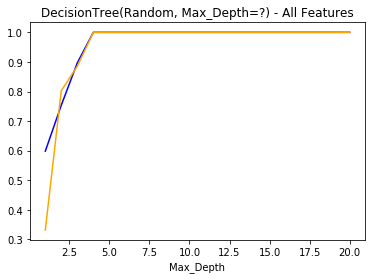

In [30]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]


for i in range(1, 21):

    clf = tree.DecisionTreeClassifier(splitter='random', max_depth=i, random_state=3)
    clf=clf.fit(X_train,Y_train.values.ravel())
    clf_pred = clf.predict(X_test)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
        

m= range(1,21)
        
        
import matplotlib.pyplot as plt

plt.plot(m, accuracy, color='blue')
plt.plot(m, F1, color= 'orange')
plt.title("DecisionTree(Random, Max_Depth=?) - All Features")
plt.xlabel("Max_Depth")

print("D ", " A ", " P ", " R ", " F1 ")

for n in range(0, 20):

    print(m[n], round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))


# DecisionTree("Random, Max Depth= 4, Max_features= ?") - All Features

F   A   P   R   F1 
1 0.57 0.6 0.44 0.51
2 0.59 0.61 0.52 0.56
3 0.63 0.64 0.6 0.62
4 0.98 0.96 1.0 0.98
5 0.6 0.62 0.51 0.56
6 0.67 0.66 0.73 0.69
7 0.75 0.93 0.54 0.68
8 0.73 0.77 0.67 0.71
9 1.0 1.0 1.0 1.0
10 0.94 0.89 1.0 0.94
11 1.0 1.0 1.0 1.0
12 1.0 1.0 1.0 1.0


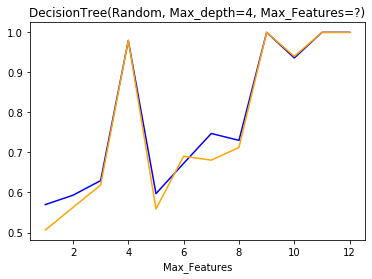

In [62]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]


for i in range(1, 13):

    clf = tree.DecisionTreeClassifier(splitter='random', max_depth=4, max_features=i, random_state=3)
    clf=clf.fit(X_train,Y_train.values.ravel())
    clf_pred = clf.predict(X_test)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
    i=i+1
        

m= range(1,13)
        
        
import matplotlib.pyplot as plt

plt.plot(m, accuracy, color='blue')
plt.plot(m, F1, color= 'orange')

plt.title("DecisionTree(Random, Max_depth=4, Max_Features=?)")
plt.xlabel("Max_Features")


print("F ", " A ", " P ", " R ", " F1 ")

for n in range(0, len(m)):

    print(m[n], round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))

# DecisionTree("Best", max_depth= ?) - All Features

D   A   P   R   F1 
1 1.0 1.0 1.0 1.0
2 1.0 1.0 1.0 1.0
3 1.0 1.0 1.0 1.0
4 1.0 1.0 1.0 1.0
5 1.0 1.0 1.0 1.0
6 1.0 1.0 1.0 1.0
7 1.0 1.0 1.0 1.0
8 1.0 1.0 1.0 1.0
9 1.0 1.0 1.0 1.0
10 1.0 1.0 1.0 1.0
11 1.0 1.0 1.0 1.0
12 1.0 1.0 1.0 1.0
13 1.0 1.0 1.0 1.0
14 1.0 1.0 1.0 1.0
15 1.0 1.0 1.0 1.0
16 1.0 1.0 1.0 1.0
17 1.0 1.0 1.0 1.0
18 1.0 1.0 1.0 1.0
19 1.0 1.0 1.0 1.0
20 1.0 1.0 1.0 1.0


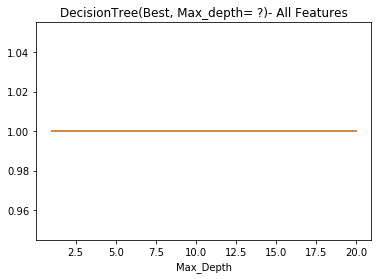

In [31]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]


for i in range(1, 21):

    clf = tree.DecisionTreeClassifier(splitter='best', max_depth=i, random_state=3)
    clf=clf.fit(X_train,Y_train.values.ravel())
    clf_pred = clf.predict(X_test)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
        

m= range(1,21)
        
        
import matplotlib.pyplot as plt

plt.plot(m, accuracy, color='blue')
plt.plot(m, F1, color= 'orange')
plt.title("DecisionTree(Best, Max_depth= ?)- All Features")
plt.xlabel("Max_Depth")

print("D ", " A ", " P ", " R ", " F1 ")

for n in range(0, 20):

    print(m[n], round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))

# DecisionTree("Best, Max Depth=6, Max_Features=?") - All Features

F  A   P   R   F1 
1 0.89 0.92 0.86 0.89
2 0.93 1.0 0.86 0.93
3 1.0 1.0 1.0 1.0
4 1.0 1.0 1.0 1.0
5 1.0 1.0 1.0 1.0
6 1.0 1.0 1.0 1.0
7 1.0 1.0 1.0 1.0
8 1.0 1.0 1.0 1.0
9 1.0 1.0 1.0 1.0
10 1.0 1.0 1.0 1.0
11 1.0 1.0 1.0 1.0
12 1.0 1.0 1.0 1.0


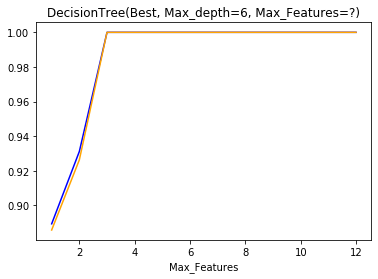

In [67]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]


for i in range(1, 13):

    clf = tree.DecisionTreeClassifier(splitter='best', max_depth=6, max_features=i, random_state=3)
    clf=clf.fit(X_train,Y_train.values.ravel())
    clf_pred = clf.predict(X_test)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
        

m= range(1,13)
        
        
import matplotlib.pyplot as plt

plt.plot(m, accuracy, color='blue')
plt.plot(m, F1, color= 'orange')
plt.title("DecisionTree(Best, Max_depth=6, Max_Features=?)")
plt.xlabel("Max_Features")

print("F", " A ", " P ", " R ", " F1 ")

for n in range(0, 12):

    print(m[n], round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))

# DecisionTree("Random", "Max_depth=?") - All Features - VIOLATIONS AND COST

D  A   P   R   F1 
1 0.54 0.53 0.81 0.64
2 0.57 0.56 0.7 0.62
3 0.57 0.55 0.76 0.64
4 0.57 0.59 0.49 0.54
5 0.58 0.56 0.73 0.64
6 0.58 0.58 0.58 0.58
7 0.59 0.58 0.66 0.62
8 0.59 0.58 0.66 0.62
9 0.59 0.58 0.64 0.61
10 0.59 0.58 0.63 0.61
11 0.59 0.58 0.63 0.61
12 0.59 0.58 0.63 0.61
13 0.59 0.58 0.63 0.61
14 0.59 0.58 0.63 0.61
15 0.59 0.58 0.63 0.61
16 0.59 0.58 0.63 0.61
17 0.59 0.58 0.63 0.61
18 0.59 0.58 0.63 0.61
19 0.59 0.58 0.63 0.61
20 0.59 0.58 0.63 0.61


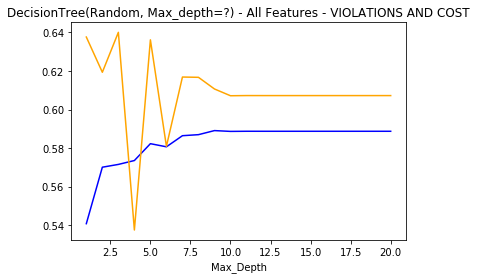

In [35]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]

X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])
X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])

for i in range(1, 21):

    clf = tree.DecisionTreeClassifier(splitter='random', max_depth=i, random_state=3)
    clf=clf.fit(X_train2,Y_train.values.ravel())
    clf_pred = clf.predict(X_test2)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
        

m= range(1,21)
        
        
import matplotlib.pyplot as plt

plt.plot(m, accuracy, color='blue')
plt.plot(m, F1, color= 'orange')
plt.title("DecisionTree(Random, Max_depth=?) - All Features - VIOLATIONS AND COST")
plt.xlabel("Max_Depth")

print("D", " A ", " P ", " R ", " F1 ")

for n in range(0, 20):

    print(m[n], round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))

# DecisionTree("Random", 'Max_Depth =7", "Max_Featues=?') - All Features - VIOLATIONS AND COST

F   A   P   R   F1 
1 0.58 0.56 0.72 0.63
2 0.57 0.57 0.65 0.6
3 0.58 0.57 0.69 0.62
4 0.58 0.58 0.61 0.59
5 0.59 0.58 0.66 0.61
6 0.59 0.58 0.65 0.61
7 0.59 0.57 0.68 0.62
8 0.59 0.58 0.66 0.61
9 0.59 0.58 0.66 0.62
10 0.59 0.58 0.64 0.61
11 0.59 0.57 0.67 0.62
12 0.59 0.58 0.64 0.61
13 0.59 0.58 0.66 0.62


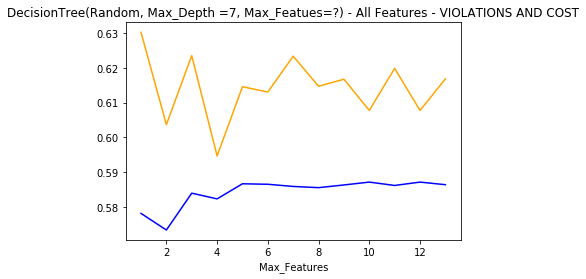

In [75]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]

X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])
X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])

for i in range(1, 14):

    clf = tree.DecisionTreeClassifier(splitter='random', max_depth=7, max_features=i, random_state=3)
    clf=clf.fit(X_train2,Y_train.values.ravel())
    clf_pred = clf.predict(X_test2)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
        

        
        
import matplotlib.pyplot as plt

plt.plot( range(1, 14), accuracy, color='blue')
plt.plot( range(1, 14), F1, color= 'orange')
plt.title("DecisionTree(Random, Max_Depth =7, Max_Featues=?) - All Features - VIOLATIONS AND COST")
plt.xlabel("Max_Features")

print("F ", " A ", " P ", " R ", " F1 ")

for n in range(0, 13):

    print(n+1, round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))

# DecisionTree("Best", "Max_Depth=?") - All Features - VIOLATIONS AND COST

D   A   P   R   F1 
1 0.54 0.53 0.81 0.64
2 0.57 0.56 0.7 0.62
3 0.57 0.55 0.76 0.64
4 0.57 0.59 0.49 0.54
5 0.58 0.56 0.73 0.64
6 0.58 0.58 0.58 0.58
7 0.59 0.58 0.66 0.62
8 0.59 0.58 0.66 0.62
9 0.59 0.58 0.64 0.61
10 0.59 0.58 0.63 0.61
11 0.59 0.58 0.63 0.61
12 0.59 0.58 0.63 0.61
13 0.59 0.58 0.63 0.61
14 0.59 0.58 0.63 0.61
15 0.59 0.58 0.63 0.61
16 0.59 0.58 0.63 0.61
17 0.59 0.58 0.63 0.61
18 0.59 0.58 0.63 0.61
19 0.59 0.58 0.63 0.61
20 0.59 0.58 0.63 0.61


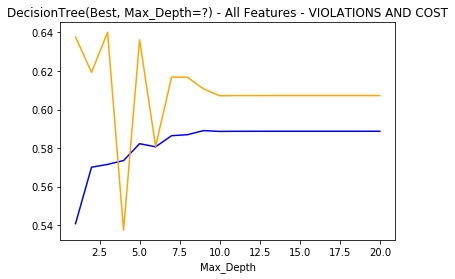

In [34]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]

X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])
X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])

for i in range(1, 21):

    clf = tree.DecisionTreeClassifier(splitter='best', max_depth=i, random_state=3)
    clf=clf.fit(X_train2,Y_train.values.ravel())
    clf_pred = clf.predict(X_test2)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
        

m= range(1,21)
        
        
import matplotlib.pyplot as plt

plt.plot(m, accuracy, color='blue')
plt.plot(m, F1, color= 'orange')
plt.title("DecisionTree(Best, Max_Depth=?) - All Features - VIOLATIONS AND COST")
plt.xlabel("Max_Depth")

print("D ", " A ", " P ", " R ", " F1 ")

for n in range(0, 20):

    print(m[n], round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))

# DecisionTree("Best", 'Max_Depth =7", "Max_Featues=?') - All Features - VIOLATIONS AND COST

F   A   P   R   F1 
1 0.58 0.58 0.6 0.59
2 0.58 0.57 0.67 0.61
3 0.59 0.58 0.65 0.61
4 0.59 0.57 0.69 0.62
5 0.59 0.58 0.66 0.62
6 0.59 0.58 0.64 0.61
7 0.59 0.58 0.61 0.6
8 0.59 0.58 0.64 0.61
9 0.59 0.58 0.64 0.61
10 0.59 0.58 0.66 0.62
11 0.59 0.58 0.64 0.61
12 0.59 0.58 0.66 0.62
13 0.59 0.58 0.66 0.62


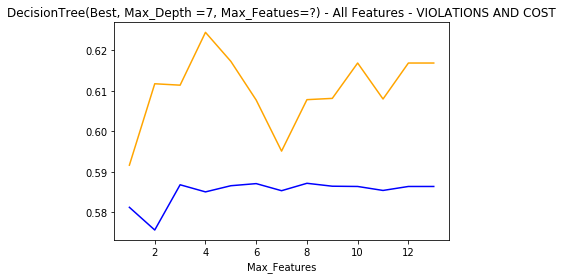

In [78]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
import sklearn as sk

accuracy=[]
F1=[]
precision=[]
recall=[]

X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])
X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])

for i in range(1, 14):

    clf = tree.DecisionTreeClassifier(splitter='best', max_depth=7, max_features=i, random_state=3)
    clf=clf.fit(X_train2,Y_train.values.ravel())
    clf_pred = clf.predict(X_test2)
    rf_con_mat = confusion_matrix(Y_test, clf_pred, [0, 1])
    accuracy.append( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
    F1.append(sk.metrics.f1_score(Y_test, clf_pred))
    precision.append(sk.metrics.precision_score(Y_test, clf_pred))
    recall.append(sk.metrics.recall_score(Y_test, clf_pred))
        

        
        
import matplotlib.pyplot as plt

plt.plot(range(1,14), accuracy, color='blue')
plt.plot(range(1,14), F1, color= 'orange')
plt.title("DecisionTree(Best, Max_Depth =7, Max_Featues=?) - All Features - VIOLATIONS AND COST")
plt.xlabel("Max_Features")

print("F ", " A ", " P ", " R ", " F1 ")

for n in range(0, 13):

    print(n+1, round(accuracy[n],2), round(precision[n],2), round(recall[n],2), round(F1[n],2))



In [38]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


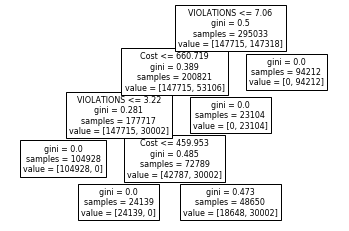

<Figure size 864x864 with 0 Axes>

In [35]:
from sklearn import tree
import sklearn as sk
import matplotlib.pyplot as plt
import graphviz
import pydotplus

IdealTree= tree.DecisionTreeClassifier(splitter='random', max_depth=4, max_features=10, random_state=3)
IdealTree=IdealTree.fit(X_train,Y_train.values.ravel())

tree.plot_tree(IdealTree, feature_names = X_train.columns)

plt.figure(figsize= (12, 12))

dot_data = tree.export_graphviz(IdealTree,out_file="Tree.Dot", class_names=True)
 


# Decision Tree Insights

In [311]:
N_data=Data[ (Data['VIOLATIONS'] > 7.06) | ((Data['VIOLATIONS'] <= 7.06) & (Data['Cost'] > 660.719))]

## Rules from the Decision Tree

In [326]:
N_data['RedFlag'].value_counts()

## We know that this decision tree has guessed correctly. 

1    79445
Name: RedFlag, dtype: int64

In [316]:
N_data['Region_1'].value_counts() / (N_data.shape[0])

0    0.797508
1    0.202492
Name: Region_1, dtype: float64

In [317]:
N_data['Region_2'].value_counts() / (N_data.shape[0])

0    0.716722
1    0.283278
Name: Region_2, dtype: float64

In [318]:
N_data['Region_3'].value_counts() / (N_data.shape[0])

0    0.832866
1    0.167134
Name: Region_3, dtype: float64

In [319]:
N_data['Region_4'].value_counts() / (N_data.shape[0])

0    0.789301
1    0.210699
Name: Region_4, dtype: float64

In [320]:
N_data['Region_5'].value_counts() / (N_data.shape[0])

0    0.863604
1    0.136396
Name: Region_5, dtype: float64

In [126]:
N_data['RedFlag'].value_counts() / (N_data.shape[0])

1    1.0
Name: RedFlag, dtype: float64

# NB(Smoothing=0.02)- ALL FEATURES

In [173]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.02)


y_pred = gnb.fit(X_train, Y_train.values.ravel()).predict(X_test)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))


Accuracy 0.9
F1 0.89
Precision 1.0
Recall 0.79


# NB(Smoothing=0.02)- ALL FEATURES - VIOLATIONS AND COST

In [369]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.02)

X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])
X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])


y_pred = gnb.fit(X_train2, Y_train.values.ravel()).predict(X_test2)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))


Accuracy 0.57
F1 0.58
Precision 0.57
Recall 0.6


# NB(Smoothing=0.1)- ALL FEATURES

In [177]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.1)


y_pred = gnb.fit(X_train, Y_train.values.ravel()).predict(X_test)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))


Accuracy 0.82
F1 0.78
Precision 1.0
Recall 0.64


# NB(Smoothing=0.1)- ALL FEATURES - VIOLATIONS AND COST

In [370]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.1)

X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])
X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])


y_pred = gnb.fit(X_train2, Y_train.values.ravel()).predict(X_test2)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))

Accuracy 0.57
F1 0.58
Precision 0.57
Recall 0.59


# NB(Smoothing=0.5)- ALL FEATURES

In [178]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.5)


y_pred = gnb.fit(X_train, Y_train.values.ravel()).predict(X_test)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))


Accuracy 0.71
F1 0.6
Precision 1.0
Recall 0.43


# NB(Smoothing=0.5)- ALL FEATURES - VIOLATIONS AND COST

In [371]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.5)

X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])
X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])


y_pred = gnb.fit(X_train2, Y_train.values.ravel()).predict(X_test2)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))

Accuracy 0.58
F1 0.6
Precision 0.57
Recall 0.62


# NB(Smoothing=0.01)- ALL FEATURES

In [180]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.01)


y_pred = gnb.fit(X_train, Y_train.values.ravel()).predict(X_test)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))


Accuracy 1.0
F1 1.0
Precision 1.0
Recall 1.0


# NB(Smoothing=0.01)- ALL FEATURES - VIOLATIONS AND COST

In [372]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.01)

X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])
X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])


y_pred = gnb.fit(X_train2, Y_train.values.ravel()).predict(X_test2)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))

Accuracy 0.57
F1 0.58
Precision 0.57
Recall 0.6


# NB(Smoothing=0.9)- ALL FEATURES 

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.9)


y_pred = gnb.fit(X_train, Y_train.values.ravel()).predict(X_test)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))


Accuracy 0.68
F1 0.53
Precision 1.0
Recall 0.36


# NB(Smoothing=0.9)- ALL FEATURES  - VIOLATIONS AND COST

In [373]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.9)

X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])
X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])


y_pred = gnb.fit(X_train2, Y_train.values.ravel()).predict(X_test2)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))

Accuracy 0.58
F1 0.6
Precision 0.57
Recall 0.63


# NB(Smoothing=5)- ALL FEATURES  

In [185]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=5)


y_pred = gnb.fit(X_train, Y_train.values.ravel()).predict(X_test)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))

Accuracy 0.63
F1 0.41
Precision 1.0
Recall 0.26


# NB(Smoothing=5)- ALL FEATURES  - VIOLATIONS AND COST

In [374]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=5)

X_test2= X_test.drop(columns=['VIOLATIONS', 'Cost'])
X_train2= X_train.drop(columns=['VIOLATIONS', 'Cost'])


y_pred = gnb.fit(X_train2, Y_train.values.ravel()).predict(X_test2)
rf_con_mat = confusion_matrix(Y_test, y_pred, [0, 1])
Accuracy=( (rf_con_mat[0, 0] + rf_con_mat[1, 1]) / float(np.sum(rf_con_mat)))
F1=(sk.metrics.f1_score(Y_test, y_pred))
Precision= (sk.metrics.precision_score(Y_test, y_pred))
Recall=(sk.metrics.recall_score(Y_test, y_pred))

print("Accuracy", round(Accuracy,2))

print("F1", round(F1,2)) 

print("Precision", round(Precision,2))

print("Recall", round(Recall,2))

Accuracy 0.57
F1 0.6
Precision 0.57
Recall 0.64


In [259]:
X_test=X_test.drop(columns='Row_Number')


In [321]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB(var_smoothing=0.02)


A= gnb.fit(X_train, Y_train.values.ravel()).predict(X_test)

In [322]:
P=gnb.predict_proba(X_test)

In [323]:
P=pd.DataFrame(P)

In [277]:
X_test

,Region_5,Region_4,Winter,Region_2,2014,Region_1,2016,2017,2015,Spring,Fall,Region_3,Cost,Summer,VIOLATIONS
397143,0,0,1,1,0,0,0,1,0,0,0,0,900,0,9
146660,0,1,1,0,0,0,0,0,1,0,0,0,100,0,1
334312,1,0,0,0,1,0,0,0,0,0,1,0,700,0,7
410143,0,0,1,0,0,1,0,0,1,0,0,0,1900,0,19
102527,0,0,1,1,0,0,0,1,0,0,0,0,1500,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206815,0,1,0,0,0,0,1,0,0,0,0,0,600,1,6
91771,0,1,1,0,0,0,0,1,0,0,0,0,500,0,5
207107,0,0,0,1,0,0,1,0,0,0,0,0,300,1,3
310389,0,1,0,0,0,0,0,0,1,0,1,0,100,0,1


In [290]:
P

,0,1
0,1.234817e-02,0.987652
1,8.699975e-01,0.130003
2,2.607393e-01,0.739261
3,1.452945e-17,1.000000
4,4.706390e-10,1.000000
...,...,...
126438,5.462326e-01,0.453767
126439,7.536611e-01,0.246339
126440,8.908284e-01,0.109172
126441,8.699969e-01,0.130003


In [324]:
pd.DataFrame.to_csv(P, "Naive_Prob.csv")

In [325]:
pd.DataFrame.to_csv(X_test, "X_test.csv")

In [ ]:
4